In [1]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from traffic.core import Traffic

from datetime import datetime
import calendar
import statistics
import statsmodels.api as sm

import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the data
df = pd.read_csv('first10%_data.csv')
df

,time,icao24,lat,lon,velocity,heading,vertrate,callsign,onground,alert,spi,squawk,baroaltitude,geoaltitude,lastposupdate,lastcontact,hour
0,1477057155,a45cef,33.795083,-84.475079,247.890381,347.997437,NaN,NaN,False,False,False,NaN,NaN,9776.46,1.477057e+09,1.477057e+09,1.477055e+09
1,1477057156,a45cef,33.795083,-84.475079,247.890381,347.997437,NaN,NaN,False,False,False,NaN,NaN,9776.46,1.477057e+09,1.477057e+09,1.477055e+09
2,1477057157,a45cef,33.795083,-84.475079,247.890381,347.997437,NaN,NaN,False,False,False,NaN,NaN,9776.46,1.477057e+09,1.477057e+09,1.477055e+09
3,1477057158,a45cef,33.795083,-84.475079,247.890381,347.997437,NaN,NaN,False,False,False,NaN,NaN,9776.46,1.477057e+09,1.477057e+09,1.477055e+09
4,1477057159,a45cef,33.795083,-84.475079,247.890381,347.997437,NaN,NaN,False,False,False,NaN,NaN,9776.46,1.477057e+09,1.477057e+09,1.477055e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2353060,1498947781,ab00d6,33.841507,-84.386771,170.844986,99.008504,3.2512,DAL72,False,False,False,2061.0,3322.32,3482.34,1.498948e+09,1.498948e+09,1.498946e+09
2353061,1498947782,ab00d6,33.841507,-84.386771,170.844986,99.008504,3.2512,DAL72,False,False,False,2061.0,3322.32,3482.34,1.498948e+09,1.498948e+09,1.498946e+09
2353062,1498947783,ab00d6,33.841507,-84.386771,170.844986,99.008504,3.2512,DAL72,False,False,False,2061.0,3322.32,3482.34,1.498948e+09,1.498948e+09,1.498946e+09
2353063,1498947784,ab00d6,33.841507,-84.386771,170.844986,99.008504,3.2512,DAL72,False,False,False,2061.0,3322.32,3482.34,1.498948e+09,1.498948e+09,1.498946e+09


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2353065 entries, 0 to 2353064
Data columns (total 17 columns):
 #   Column         Dtype  
---  ------         -----  
 0   time           int64  
 1   icao24         object 
 2   lat            float64
 3   lon            float64
 4   velocity       float64
 5   heading        float64
 6   vertrate       float64
 7   callsign       object 
 8   onground       bool   
 9   alert          bool   
 10  spi            bool   
 11  squawk         float64
 12  baroaltitude   float64
 13  geoaltitude    float64
 14  lastposupdate  float64
 15  lastcontact    float64
 16  hour           float64
dtypes: bool(3), float64(11), int64(1), object(2)
memory usage: 258.1+ MB


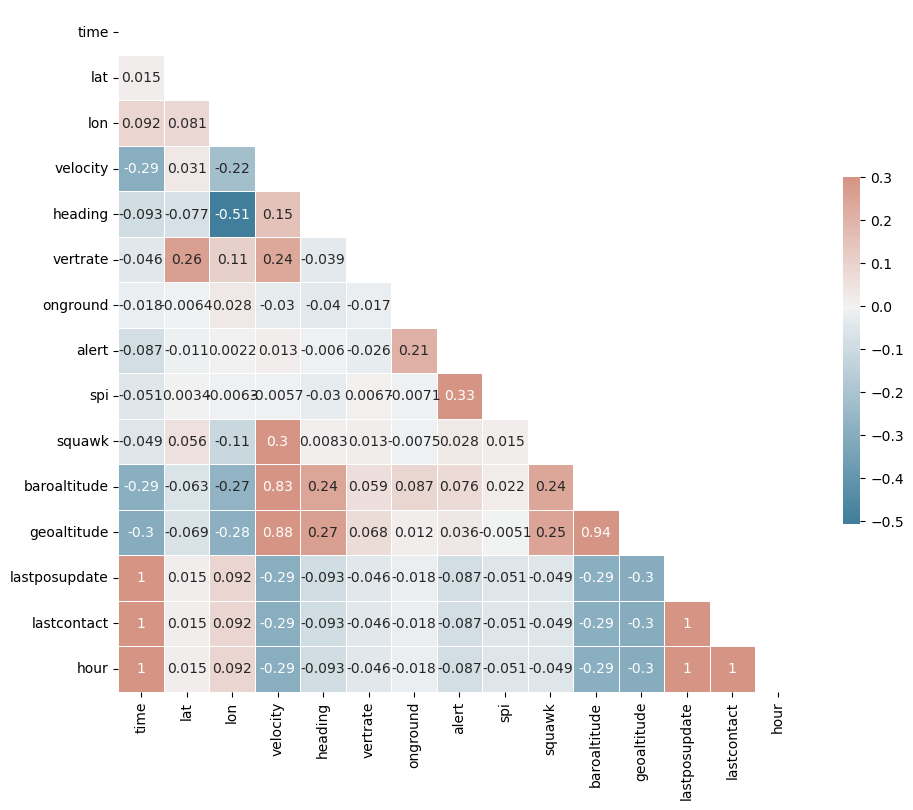

In [12]:
df_corr = df.drop(columns=['icao24', 'callsign'])
# Calculate the correlation matrix
corr = df_corr.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio, and add annotations
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()

**Dữ liệu chuyến bay có các cột sau đây, mỗi cột mang một ý nghĩa cụ thể liên quan đến thông tin của chuyến bay:**

time (int64): Thời gian của bản ghi, thời gian tính bằng giây kể từ epoch (Unix timestamp).

icao24 (object): Mã định danh 24-bit của máy bay, là duy nhất cho mỗi máy bay và được cấp phát bởi ICAO.

lat (float64): Vĩ độ của vị trí hiện tại của máy bay.

lon (float64): Kinh độ của vị trí hiện tại của máy bay.

velocity (float64): Tốc độ của máy bay tính bằng mét/giây.

heading (float64): Hướng đi của máy bay tính bằng độ, từ 0 đến 360 độ.

vertrate (float64): Tốc độ thay đổi độ cao của máy bay, tính bằng feet/phút.

callsign (object): Mã hiệu (callsign) của chuyến bay, thường là số hiệu chuyến bay do hãng hàng không cấp phát.

onground (bool): Trạng thái của máy bay, cho biết máy bay đang ở trên mặt đất (True) hay không (False).

alert (bool): Trạng thái báo động, cho biết máy bay đang ở trong tình trạng báo động (True) hay không (False).

spi (bool): Special Position Indicator, cho biết máy bay có đang phát tín hiệu vị trí đặc biệt (True) hay không (False).

squawk (float64): Mã squawk của máy bay, là mã transponder dùng để nhận dạng máy bay hoặc chỉ báo các tình huống đặc biệt.

baroaltitude (float64): Độ cao so với mặt biển theo áp suất khí quyển (barometric altitude), tính bằng mét.

geoaltitude (float64): Độ cao thực tế so với mực nước biển (geometric altitude), tính bằng mét.

lastposupdate (float64): Thời gian cập nhật vị trí cuối cùng, tính bằng giây kể từ epoch, thời gian tính bằng giây kể từ epoch (Unix timestamp).

lastcontact (float64): Thời gian liên lạc cuối cùng với hệ thống giám sát, tính bằng giây kể từ epoch, thời gian tính bằng giây kể từ epoch (Unix timestamp).

hour (float64): Giá trị giờ của bản ghi, có thể là thời gian cụ thể hoặc chỉ số giờ trong ngày (từ 0 đến 23)

<Axes: >

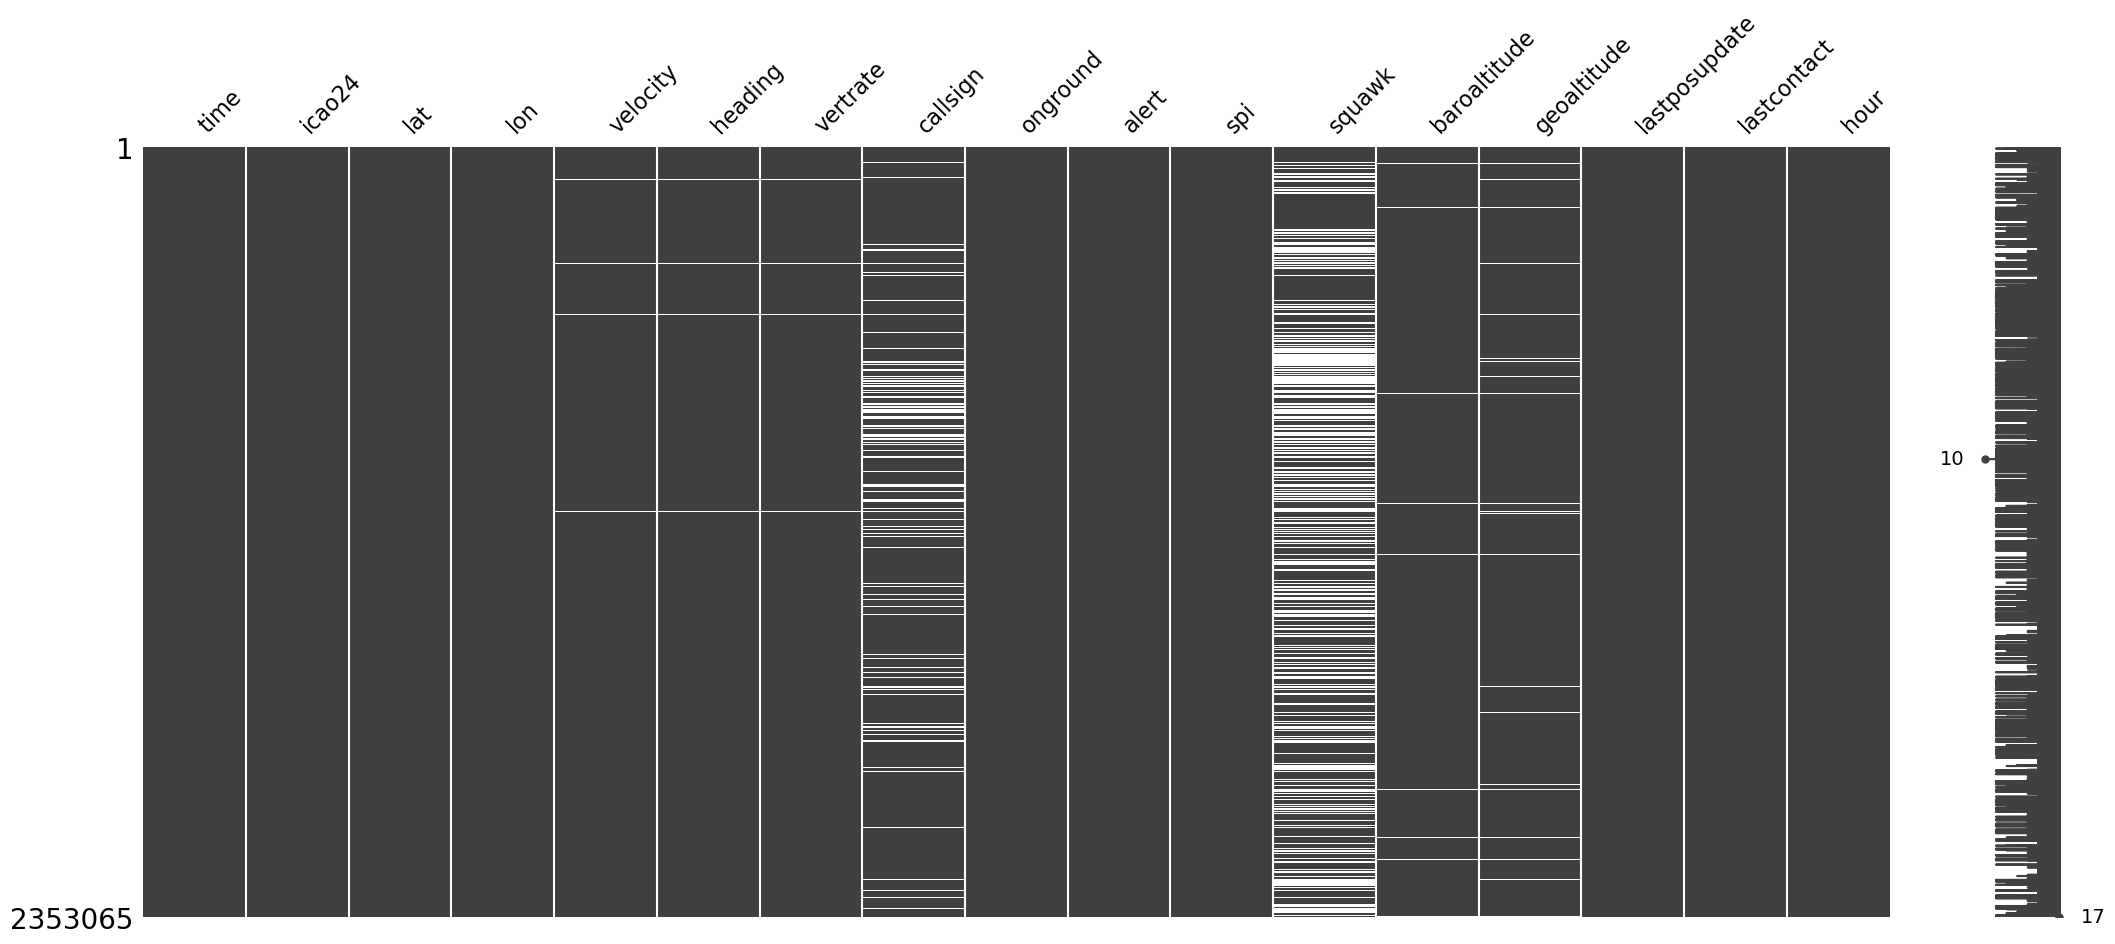

In [4]:
import missingno as msno
msno.matrix(df)

In [6]:
data = df.rename(columns={
    'time': 'timestamp',
    'lat': 'latitude',
    'lon': 'longitude',
    'velocity': 'groundspeed',
    'heading': 'track',
    'vertrate': 'vertical_rate',
    'baroaltitude': 'altitude'
    'hour': 'start_time'
})


In [7]:
# Chuyển đổi thời gian từ định dạng Unix timestamp sang datetime
data['timestamp'] = pd.to_datetime(data['timestamp'], unit='s')
data['lastcontact'] = pd.to_datetime(data['lastcontact'], unit='s')
data['lastposupdate'] = pd.to_datetime(data['lastposupdate'], unit='s')
data['hour'] = pd.to_datetime(data['hour'], unit='s')



In [8]:
data

,timestamp,icao24,latitude,longitude,groundspeed,track,vertical_rate,callsign,onground,alert,spi,squawk,altitude,geoaltitude,lastposupdate,lastcontact,hour
0,2016-10-21 13:39:15,a45cef,33.795083,-84.475079,247.890381,347.997437,NaN,NaN,False,False,False,NaN,NaN,9776.46,2016-10-21 13:39:15.000000000,2016-10-21 13:39:15.000000000,2016-10-21 13:00:00
1,2016-10-21 13:39:16,a45cef,33.795083,-84.475079,247.890381,347.997437,NaN,NaN,False,False,False,NaN,NaN,9776.46,2016-10-21 13:39:15.000000000,2016-10-21 13:39:15.000000000,2016-10-21 13:00:00
2,2016-10-21 13:39:17,a45cef,33.795083,-84.475079,247.890381,347.997437,NaN,NaN,False,False,False,NaN,NaN,9776.46,2016-10-21 13:39:15.000000000,2016-10-21 13:39:15.000000000,2016-10-21 13:00:00
3,2016-10-21 13:39:18,a45cef,33.795083,-84.475079,247.890381,347.997437,NaN,NaN,False,False,False,NaN,NaN,9776.46,2016-10-21 13:39:15.000000000,2016-10-21 13:39:15.000000000,2016-10-21 13:00:00
4,2016-10-21 13:39:19,a45cef,33.795083,-84.475079,247.890381,347.997437,NaN,NaN,False,False,False,NaN,NaN,9776.46,2016-10-21 13:39:15.000000000,2016-10-21 13:39:15.000000000,2016-10-21 13:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2353060,2017-07-01 22:23:01,ab00d6,33.841507,-84.386771,170.844986,99.008504,3.2512,DAL72,False,False,False,2061.0,3322.32,3482.34,2017-07-01 22:19:33.907000065,2017-07-01 22:19:37.817999840,2017-07-01 22:00:00
2353061,2017-07-01 22:23:02,ab00d6,33.841507,-84.386771,170.844986,99.008504,3.2512,DAL72,False,False,False,2061.0,3322.32,3482.34,2017-07-01 22:19:33.907000065,2017-07-01 22:19:37.817999840,2017-07-01 22:00:00
2353062,2017-07-01 22:23:03,ab00d6,33.841507,-84.386771,170.844986,99.008504,3.2512,DAL72,False,False,False,2061.0,3322.32,3482.34,2017-07-01 22:19:33.907000065,2017-07-01 22:19:37.817999840,2017-07-01 22:00:00
2353063,2017-07-01 22:23:04,ab00d6,33.841507,-84.386771,170.844986,99.008504,3.2512,DAL72,False,False,False,2061.0,3322.32,3482.34,2017-07-01 22:19:33.907000065,2017-07-01 22:19:37.817999840,2017-07-01 22:00:00


In [9]:
traffic_data = Traffic(data)
traffic_data


,,count
icao24,callsign,
a18d60,N2AQ,109671
a42f04,N369PD,61444
a5977f,N46CL,32797
a05cd7,N122TP,32543
ad806d,N9693Y,14891
a55d6a,N445CH,14855
ace31a,N9298S,14696
ab2f35,N82HD,13520
abcd31,N86HD,12457


Output()

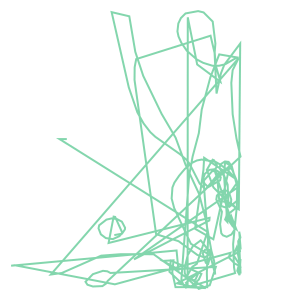

In [17]:
traffic_data["N5TC"]

In [13]:
data_a636ea = data[data['icao24'] == 'a636ea']
data_a636ea

,timestamp,icao24,latitude,longitude,groundspeed,track,vertical_rate,callsign,onground,alert,spi,squawk,altitude,geoaltitude,lastposupdate,lastcontact,hour
470994,2017-02-21 17:42:22,a636ea,33.750732,-84.397421,NaN,NaN,NaN,NaN,False,False,False,NaN,487.68,NaN,2017-02-21 17:42:21.612000227,2017-02-21 17:42:21.612000227,2017-02-21 17:00:00
470996,2017-02-21 17:42:23,a636ea,33.750732,-84.397421,NaN,NaN,NaN,NaN,False,False,False,NaN,487.68,NaN,2017-02-21 17:42:21.612000227,2017-02-21 17:42:21.612000227,2017-02-21 17:00:00
470998,2017-02-21 17:42:24,a636ea,33.750732,-84.397421,NaN,NaN,NaN,NaN,False,False,False,NaN,487.68,NaN,2017-02-21 17:42:21.612000227,2017-02-21 17:42:21.612000227,2017-02-21 17:00:00
471000,2017-02-21 17:42:25,a636ea,33.750732,-84.397421,NaN,NaN,NaN,NaN,False,False,False,NaN,487.68,NaN,2017-02-21 17:42:21.612000227,2017-02-21 17:42:21.612000227,2017-02-21 17:00:00
471002,2017-02-21 17:42:26,a636ea,33.752467,-84.397659,NaN,NaN,NaN,NaN,False,False,False,NaN,487.68,NaN,2017-02-21 17:42:25.957000017,2017-02-21 17:42:25.957000017,2017-02-21 17:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2330070,2017-06-29 19:15:35,a636ea,33.751676,-84.408245,27.799023,51.009006,0.97536,NaN,False,False,False,151.0,541.02,548.64,2017-06-29 19:13:05.793999910,2017-06-29 19:15:34.979000092,2017-06-29 19:00:00
2330071,2017-06-29 19:15:36,a636ea,33.751676,-84.408245,27.799023,51.009006,0.97536,NaN,False,False,False,151.0,541.02,548.64,2017-06-29 19:13:05.793999910,2017-06-29 19:15:34.979000092,2017-06-29 19:00:00
2330072,2017-06-29 19:15:37,a636ea,33.751676,-84.408245,27.799023,51.009006,0.97536,NaN,False,False,False,151.0,541.02,548.64,2017-06-29 19:13:05.793999910,2017-06-29 19:15:36.497999907,2017-06-29 19:00:00
2330073,2017-06-29 19:15:38,a636ea,33.751676,-84.408245,27.799023,51.009006,0.97536,NaN,False,False,False,151.0,541.02,548.64,2017-06-29 19:13:05.793999910,2017-06-29 19:15:37.809000015,2017-06-29 19:00:00


In [17]:
grouped_data_a636ea = data_a636ea.groupby('hour').agg(list).reset_index()
grouped_data_a636ea

,hour,timestamp,icao24,latitude,longitude,groundspeed,track,vertical_rate,callsign,onground,alert,spi,squawk,altitude,geoaltitude,lastposupdate,lastcontact
0,2017-02-21 17:00:00,"[2017-02-21 17:42:22, 2017-02-21 17:42:23, 201...","[a636ea, a636ea, a636ea, a636ea, a636ea, a636e...","[33.750732421875, 33.750732421875, 33.75073242...","[-84.39742107780614, -84.39742107780614, -84.3...","[nan, nan, nan, nan, nan, 44.29001340207555, 4...","[nan, nan, nan, nan, nan, 357.3369992339328, 3...","[nan, nan, nan, nan, nan, 1.6256, 1.6256, 1.62...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[False, False, False, False, False, False, Fal...","[False, False, False, False, False, False, Fal...","[False, False, False, False, False, False, Fal...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[487.68, 487.68, 487.68, 487.68, 487.68, 487.6...","[nan, nan, nan, nan, nan, 510.54, 510.54, 510....","[2017-02-21 17:42:21.612000227, 2017-02-21 17:...","[2017-02-21 17:42:21.612000227, 2017-02-21 17:..."
1,2017-03-10 02:00:00,"[2017-03-10 02:15:24, 2017-03-10 02:15:25, 201...","[a636ea, a636ea, a636ea, a636ea, a636ea, a636e...","[33.774581909179695, 33.774581909179695, 33.77...","[-84.44147849569515, -84.44147849569515, -84.4...","[45.472310161674955, 45.472310161674955, 45.47...","[134.54164354199958, 134.54164354199958, 134.5...","[0.97536, 0.97536, 0.97536, 0.97536, 0.97536, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[False, False, False, False, False, False, Fal...","[False, False, False, False, False, False, Fal...","[False, False, False, False, False, False, Fal...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[487.68, 487.68, 487.68, 487.68, 487.68, 487.6...","[480.06, 480.06, 480.06, 480.06, 480.06, 480.0...","[2017-03-10 02:15:23.423000097, 2017-03-10 02:...","[2017-03-10 02:15:23.423000097, 2017-03-10 02:..."
2,2017-03-10 19:00:00,"[2017-03-10 19:31:49, 2017-03-10 19:31:50, 201...","[a636ea, a636ea, a636ea, a636ea, a636ea, a636e...","[33.83807683395127, 33.83761596679688, 33.8372...","[-84.38472747802734, -84.3850334323182, -84.38...","[46.24276422770247, 46.24276422770247, 46.2427...","[212.2756443145776, 212.2756443145776, 212.275...","[0.3251199999999999, -1.30048, -1.30048, -1.30...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[False, False, False, False, False, False, Fal...","[False, False, False, False, False, False, Fal...","[False, False, False, False, False, False, Fal...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[487.68, 487.68, 487.68, 487.68, 487.68, 487.6...","[480.06, 502.92, 502.92, 502.92, 502.92, 502.9...","[2017-03-10 19:31:48.637999773, 2017-03-10 19:...","[2017-03-10 19:31:48.637999773, 2017-03-10 19:..."
3,2017-03-11 17:00:00,"[2017-03-11 17:03:19, 2017-03-11 17:03:20, 201...","[a636ea, a636ea, a636ea, a636ea, a636ea, a636e...","[33.77811755164195, 33.77830376059322, 33.7783...","[-84.3830680847168, -84.38283920288086, -84.38...","[24.26627494749864, 23.32650435671012, 23.3265...","[57.994616791916506, 48.57633437499736, 48.576...","[0.6502399999999999, 0.6502399999999999, 0.650...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[False, False, False, False, False, False, Fal...","[False, False, False, False, False, False, Fal...","[False, False, False, False, False, False, Fal...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[472.44, 472.44, 472.44, 472.44, 472.44, 472.4...","[548.64, 464.82, 464.82, 464.82, 464.82, 464.8...","[2017-03-11 17:03:18.577999830, 2017-03-11 17:...","[2017-03-11 17:03:18.577999830, 2017-03-11 17:..."
4,2017-03-11 18:00:00,"[2017-03-11 18:13:45, 2017-03-11 18:13:46, 201...","[a636ea, a636ea, a636ea, a636ea, a636ea, a636e...","[33.79367065429688, 33.79367065429688, 33.7936...","[-84.38733159279337, -84.38733159279337, -84.3...","[28.992011833191853, 28.992011833191853, 28.99...","[207.4744316262772, 207.4744316262772, 207.474...","[-0.97536, -0.97536, -0.97536, -0.97536, -0.97...","[nan, nan, nan, nan, nan, nan, nan, nan, 

In [20]:

import plotly.express as px

print(grouped_data_a636ea.head())

grouped_data_a636ea['latitude'] = grouped_data_a636ea['latitude'].apply(lambda x: x[0] if isinstance(x, list) else x)
grouped_data_a636ea['longitude'] = grouped_data_a636ea['longitude'].apply(lambda x: x[0] if isinstance(x, list) else x)

print(grouped_data_a636ea.head())

fig = px.line_mapbox(grouped_data_a636ea, lat="latitude", lon="longitude", zoom=3, height=600)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(title="Flight Trajectory")
fig.show()


                 hour                                          timestamp  \
0 2017-02-21 17:00:00  [2017-02-21 17:42:22, 2017-02-21 17:42:23, 201...   
1 2017-03-10 02:00:00  [2017-03-10 02:15:24, 2017-03-10 02:15:25, 201...   
2 2017-03-10 19:00:00  [2017-03-10 19:31:49, 2017-03-10 19:31:50, 201...   
3 2017-03-11 17:00:00  [2017-03-11 17:03:19, 2017-03-11 17:03:20, 201...   
4 2017-03-11 18:00:00  [2017-03-11 18:13:45, 2017-03-11 18:13:46, 201...   

                                              icao24  \
0  [a636ea, a636ea, a636ea, a636ea, a636ea, a636e...   
1  [a636ea, a636ea, a636ea, a636ea, a636ea, a636e...   
2  [a636ea, a636ea, a636ea, a636ea, a636ea, a636e...   
3  [a636ea, a636ea, a636ea, a636ea, a636ea, a636e...   
4  [a636ea, a636ea, a636ea, a636ea, a636ea, a636e...   

                                            latitude  \
0  [33.750732421875, 33.750732421875, 33.75073242...   
1  [33.774581909179695, 33.774581909179695, 33.77...   
2  [33.83807683395127, 33.837615966796

In [20]:
import plotly.express as px
import plotly.graph_objects as go


# Tạo một cột mới 'flight_id' để nhóm các chuyến bay theo callsign và thời gian
data['flight_id'] = data.groupby('callsign').cumcount()

# Tạo bản đồ với các đường bay của từng loại máy bay
fig = go.Figure()

unique_planes = data['callsign'].unique()
for callsign in unique_planes:
    plane_data = data[data['callsign'] == callsign]
    fig.add_trace(go.Scattermapbox(
        lat=plane_data['latitude'],
        lon=plane_data['longitude'],
        mode='lines',
        name=callsign
    ))

# Thiết lập bản đồ
fig.update_layout(
    mapbox_style="stamen-terrain",
    mapbox_zoom=3,
    mapbox_center={"latitude": 37.7749, "longitude": -122.4194},
    margin={"r":0,"t":0,"l":0,"b":0},
    title="Flight Paths by Callsign"
)

fig.show()


ValueError: Invalid property specified for object of type plotly.graph_objs.layout.mapbox.Center: 'latitude'

Did you mean "lat"?

    Valid properties:
        lat
            Sets the latitude of the center of the map (in degrees
            North).
        lon
            Sets the longitude of the center of the map (in degrees
            East).
        
Did you mean "lat"?

Bad property path:
latitude
^^^^^^^^

In [ ]:
# Tạo một figure và một axis
fig, ax = plt.subplots(figsize=(10, 7))

# Khởi tạo bản đồ
m = Basemap(projection='merc', llcrnrlat=-60, urcrnrlat=85, llcrnrlon=-180, urcrnrlon=180, resolution='c')
m.drawcoastlines()
m.drawcountries()
m.drawparallels(range(-90, 91, 30), labels=[1, 0, 0, 0])
m.drawmeridians(range(-180, 181, 60), labels=[0, 0, 0, 1])

# Chuyển đổi tọa độ lat/lon sang tọa độ x/y trên bản đồ
x, y = m(df['lon'].values, df['lat'].values)

# Tạo một đường lộ trình trống và một điểm đại diện cho máy bay
line, = ax.plot([], [], 'b-', lw=2)
point, = ax.plot([], [], 'ro')

# Hàm khởi tạo cho animation
def init():
    line.set_data([], [])
    point.set_data([], [])
    return line, point

# Hàm cập nhật cho animation
def update(frame):
    line.set_data(x[:frame], y[:frame])
    point.set_data(x[frame], y[frame])
    return line, point

# Tạo animation
ani = animation.FuncAnimation(fig, update, frames=len(df), init_func=init, blit=True, interval=100)

# Hiển thị bản đồ với lộ trình bay
plt.show()

In [4]:
# Draw the heatmap correlation matrix

corr = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, cmap=cmap, vmax=1, center=0.3,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

ValueError: could not convert string to float: 'a45cef'